In [131]:
library(xlsx)
library(data.table)
library(ggplot2, quietly=TRUE)
library(dplyr, quietly=TRUE)
library(xts, quietly=TRUE)
library(fpp2, quietly=TRUE)
library(GGally, quietly=TRUE)

# 1. Introduction (Selecting and Loading the Datasets)

By considering my Student ID, I must to predict Consumer Price Index(2003=100)(TURKSAT). For this dataset, data is available up to 2003. Indeed, this sitution enable us to create a model with big dataset, but it is also a restriction for selecting independent variables for training a model. Reason behind this fact caused from limited datasets in the EVDS, namely there are  few datasets(monthly) existing up to 2003. However, model includes all the data related to Consumer Price Index, and independent variables are selected by considering the availability of datasets. 

First of all, which parameters are selected must be given to explain the reasons for selection. Dollar exchange rate(TP.DK.USD.A.YTL), Interest Rate(TP.KTF10), and Gold Reserve of the central bank(TP.AB.C2) are selected for analysis. By knowing the importance of the dollar index for all operations, dollar index is the first index is set. In addition, all the processes are done with dollar. This fact can be observed at <a href="https://www.mashvisor.com/blog/exchange-rates-affect-real-estate/"> the new</a> . Second Index is Interest Rate, and a lot of business depends their operations to interest rate, which makes interest rate to a possible good independent variable to predict price index. This relevance also mentioned at <a href="https://www.mashvisor.com/blog/exchange-rates-affect-real-estate/"> the new</a>. And the last index is gold reverse. Gold Reserve is a good indicator for deciding policies for governments. Namely, by adding gold reserve level, model can explain small flactuations in the price index rather than predicting general trend. How gold reserve is related to government policy can be obtained by <a href="https://www.um.edu.mo/fba/irer/papers/current/vol18n2_pdf/03.pdf"> the article</a>. 


Namely, all the datasets for prediction are relevant to the target variable somehow. Main aim of homework is to create a model to predict feature Price Index. And before creating the model, relevancy of the indexes will be approved by visualization and finding correlations. After that, a model will be created and evaluated by looking fundamental paramaters. In other words, our first aim to find out relevancy of research question which can be listed as:

* Is there any natural relation ship between the Dollar Currency Rate and Producer Price Index, Residential Property Price Index?
* Is Residential Property Price Index vulnerable to Dollar Currency Rate and Producer Price Index?
* A lot of things in production is dependent to raw material. Does it cause a strong relation between the Dollar Currency Rate and Producer Price Index?
* Residential Property Price Index is one of the result for cost of production. So, is there any relavence between the Residential Property Price Index and Producer Price Index?
* Are all the founded resources mentioned in the introduction valid for Turkey?

After achieved first aim, second aim is to create a model without over-fitting or biased. After achieved these 2 goals, Consumer Price Index at 2020-12 will be predicted and compared with the actual value. 


# 1. Datasets

### Target value of Model

In [2]:
price_index=read.xlsx("Consumer Price Index.xlsx",sheetIndex=1, header=TRUE)
price_index$Date=as.Date(as.yearmon(price_index$Date))
colnames(price_index)[2] <- "index"

# Relevant Dataset for Independent Variable

### Interest Rate

In [3]:
interest_rate=read.xlsx("Interest Rate.xlsx",sheetIndex=1, header=TRUE)
interest_rate$Date=as.Date(as.yearmon(interest_rate$Date))

### Exchange Rate

In [4]:
exchange_rate=read.xlsx("Exchange Rate.xlsx",sheetIndex = 1, header=TRUE)
exchange_rate$Date=as.Date(as.yearmon(exchange_rate$Date))

### Gold Reserve

In [5]:
gold_reserve=read.xlsx("Gold Reserve.xlsx",sheetIndex = 1, header=TRUE)
gold_reserve$Tarih=as.Date(as.yearmon(gold_reserve$Tarih))
colnames(gold_reserve)[1] <- "Date"

# 2. Merging the datasets (by date column)

In [6]:
sub_df<-merge(price_index,interest_rate,by="Date")
sub_df1<-merge(sub_df,exchange_rate,by="Date")
df<-merge(sub_df1,gold_reserve,by="Date")

# 3. Creating a Time-Series Object

In [7]:
df_ts <- xts(df[,-1], order.by=as.Date(df[,1], "%Y/%m/%d"))
glimpse(df_ts)

An 'xts' object on 2003-01-01/2020-12-01 containing:
  Data: num [1:216, 1:4] 93.6 96.2 101 102.4 103.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "index" "TP.KTF10" "TP.DK.USD.A.YTL" "TP.AB.C2"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


### Changing Column Name of Merged Dataset

In [8]:
colnames(df_ts)[1]<-"price_index"
colnames(df_ts)[2]<-"interest_rate"
colnames(df_ts)[4]<-"gold_reserve"
colnames(df_ts)[3]<-"dollar_rate"

# 4. Visualization

## a. Line Plot for each Index

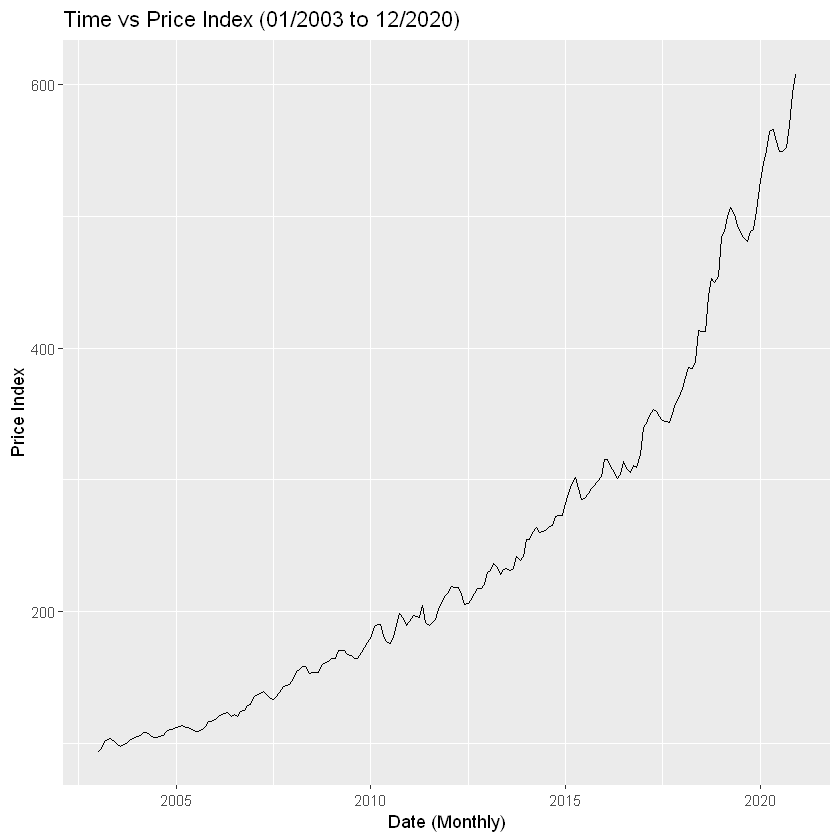

In [9]:
autoplot(df_ts[,c("price_index")])+ggtitle("Time vs Price Index (01/2003 to 12/2020)")+
  ylab("Price Index")+xlab("Date (Monthly)")

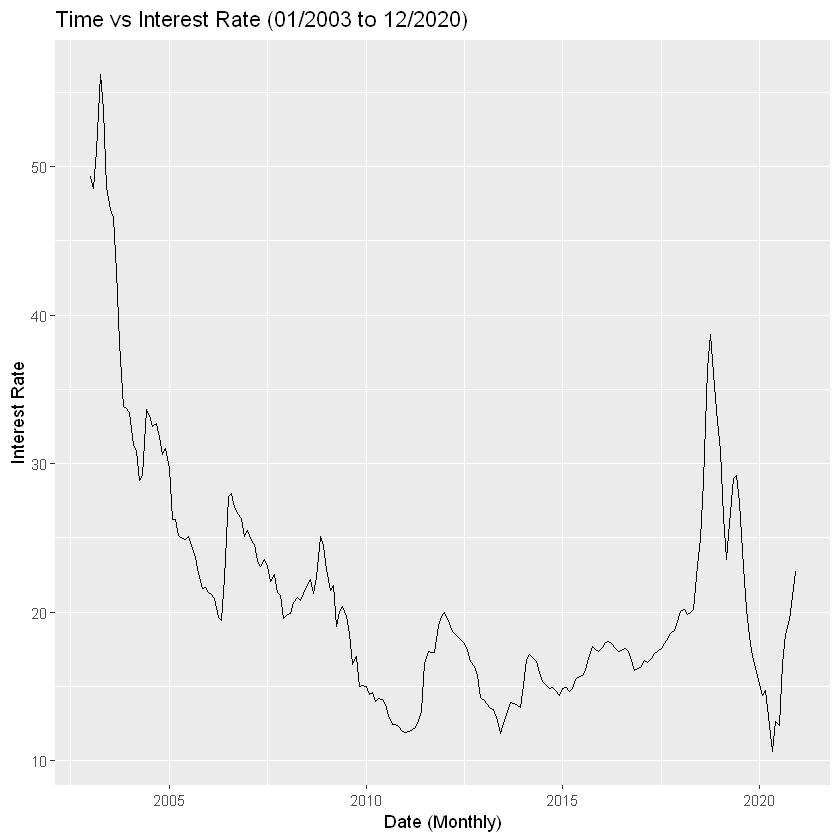

In [10]:
autoplot(df_ts[,c("interest_rate")])+ggtitle("Time vs Interest Rate (01/2003 to 12/2020)")+
  ylab("Interest Rate")+xlab("Date (Monthly)")

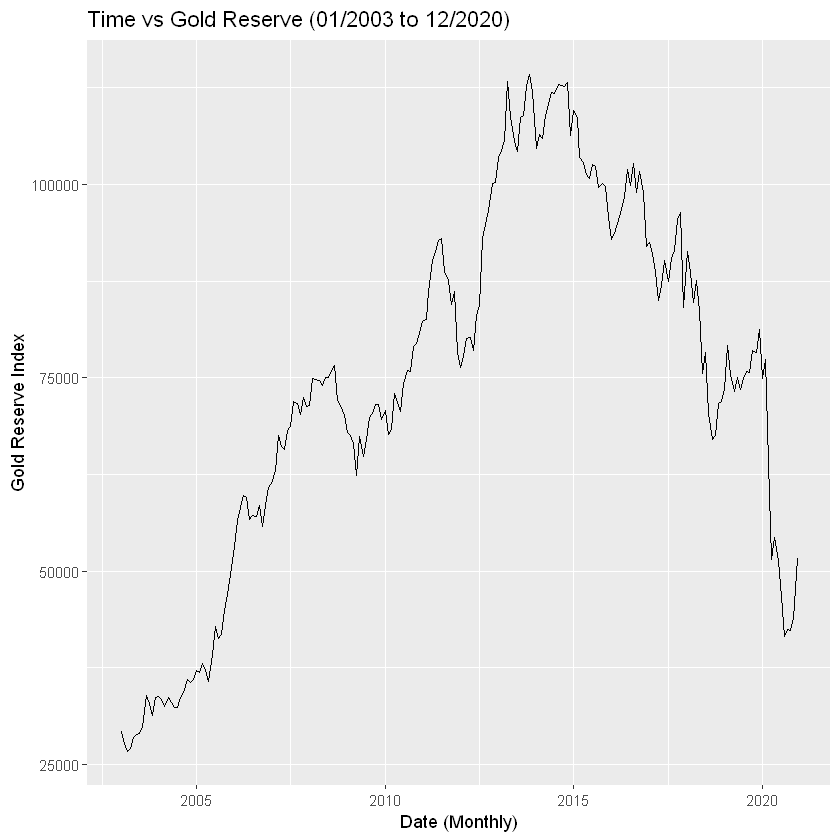

In [11]:
autoplot(df_ts[,c("gold_reserve")])+ggtitle("Time vs Gold Reserve (01/2003 to 12/2020)")+
  ylab("Gold Reserve Index")+xlab("Date (Monthly)")

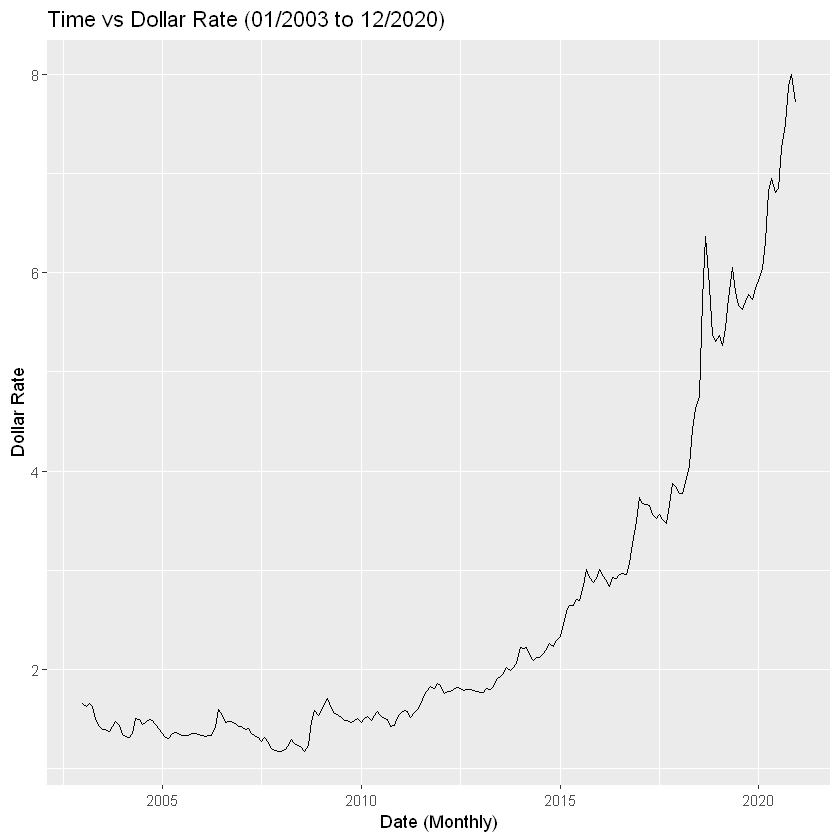

In [12]:
autoplot(df_ts[,c("dollar_rate")])+ggtitle("Time vs Dollar Rate (01/2003 to 12/2020)")+
  ylab("Dollar Rate")+xlab("Date (Monthly)")

Price Index is target aim for this homework. Both Dollar Index and Price Index have an increase trend, so dollar index can be a good independent variable to explain trend in price index. On the other hand, it is hard to say any trend in gold reserve and interest rate, but still these index can be impact on price index by considering found articles and news assocaited with connection between the indexes. Namely, other index may enable model to explain flactuations in the price index. This flatuations can be observed more easily in the next visualizations. 

## b.General looking 4 different indexes at the same plot

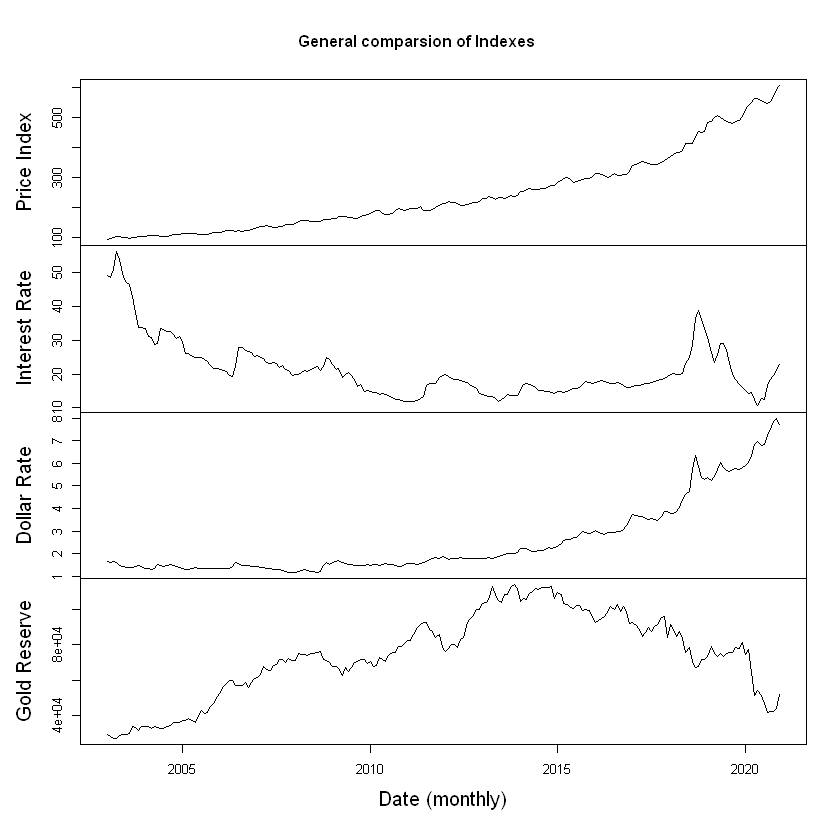

In [13]:
indexes<-c("Price Index","Interest Rate", "Dollar Rate", "Gold Reserve" )
plot(zoo(df_ts), main="General comparsion of Indexes ", xlab="Date (monthly)",ylab=indexes)

As mentioned above, observation of fluctuations hard to observe in different plots. So, all the indexes plotted at the same plot by using the zoo library. Datasets' actual values were kept in order to compare indexes by not just observing fluctuations, but also with values for datasets.

## c. Normalized Data Comparison

In [14]:
df_ts$price_index_normalized=(df_ts$price_index-min(df_ts$price_index))/(max(df_ts$price_index)-min(df_ts$price_index))
df_ts$interest_rate_normalized=(df_ts$interest_rate-min(df_ts$interest_rate))/(max(df_ts$interest_rate)-min(df_ts$interest_rate))
df_ts$gold_reserve_normalized=(df_ts$gold_reserve -min(df_ts$gold_reserve ))/(max(df_ts$gold_reserve )-min(df_ts$gold_reserve ))
df_ts$dollar_rate_normalized=(df_ts$dollar_rate -min(df_ts$dollar_rate ))/(max(df_ts$dollar_rate )-min(df_ts$dollar_rate ))

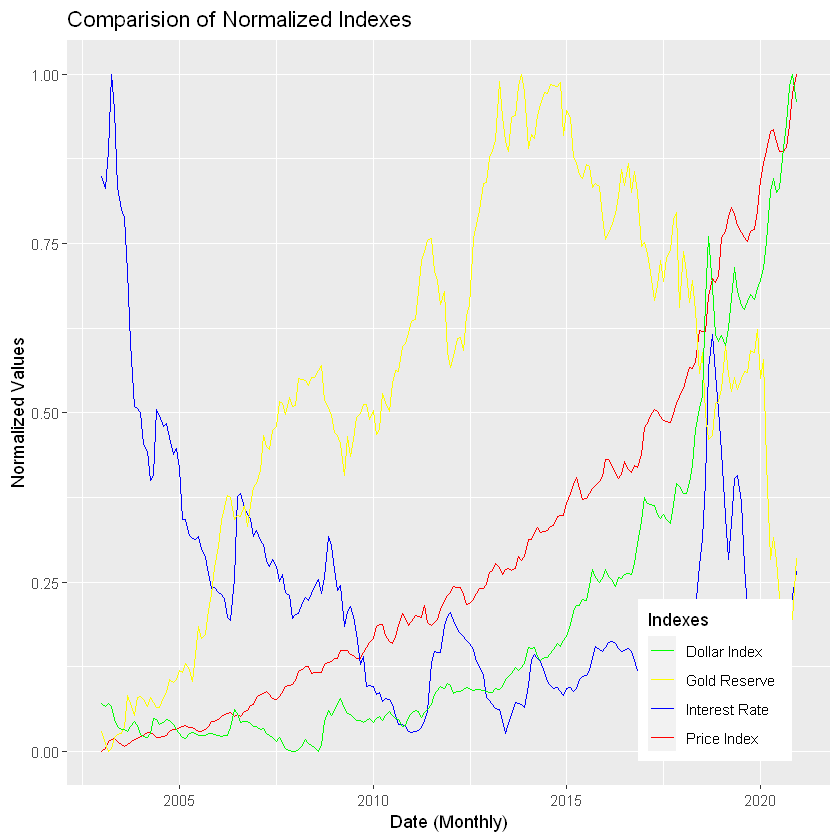

In [15]:
cols <- c("Price Index" = "red", "Interest Rate" = "blue", "Gold Reserve" = "yellow", "Dollar Index" = "green")

ggplot(df_ts)+geom_line(aes(x=Index, y=price_index_normalized,color="Price Index"))+
    geom_line(aes(x=Index, y=interest_rate_normalized ,color="Interest Rate"))+
    geom_line(aes(x=Index, y=gold_reserve_normalized , color= "Gold Reserve"))+
    geom_line(aes(x=Index, y=dollar_rate_normalized , color= "Dollar Index"))+
    ggtitle("Comparision of Normalized Indexes")+
  ylab("Normalized Values")+xlab("Date (Monthly)")+
  scale_color_manual(values = cols)+
  labs(colour = "Indexes")+ 
    theme(
    legend.position = c(.95, .25),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
    )

Lastly, a line plot with normalized values for datasets is established. The underlying reason for using normalization values is to compare indexes without struggling with the difference in actual values of datasets. In other words, it is impossible to compare and observe the values of datasets with actual values because they don't have the same unit (type) of values. 

In general, by looking all the line plots, it can be said that there are similarities between the price index and dollar rate and some similarities in terms of flactuations. This situation is a one of the good indicator for thinking there is a relevancy between the determined parameters. 


##  d. Density of Datasets

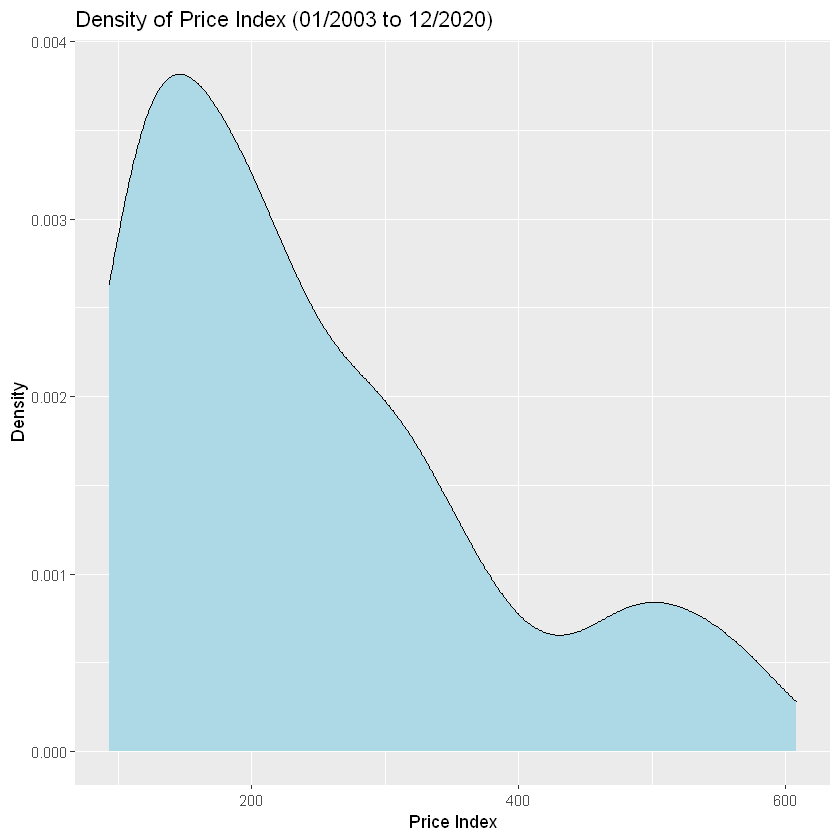

In [16]:
ggplot(df_ts, aes(price_index))+ggtitle("Density of Price Index (01/2003 to 12/2020)")+
  ylab("Density")+xlab("Price Index")+geom_density(fill="lightblue")

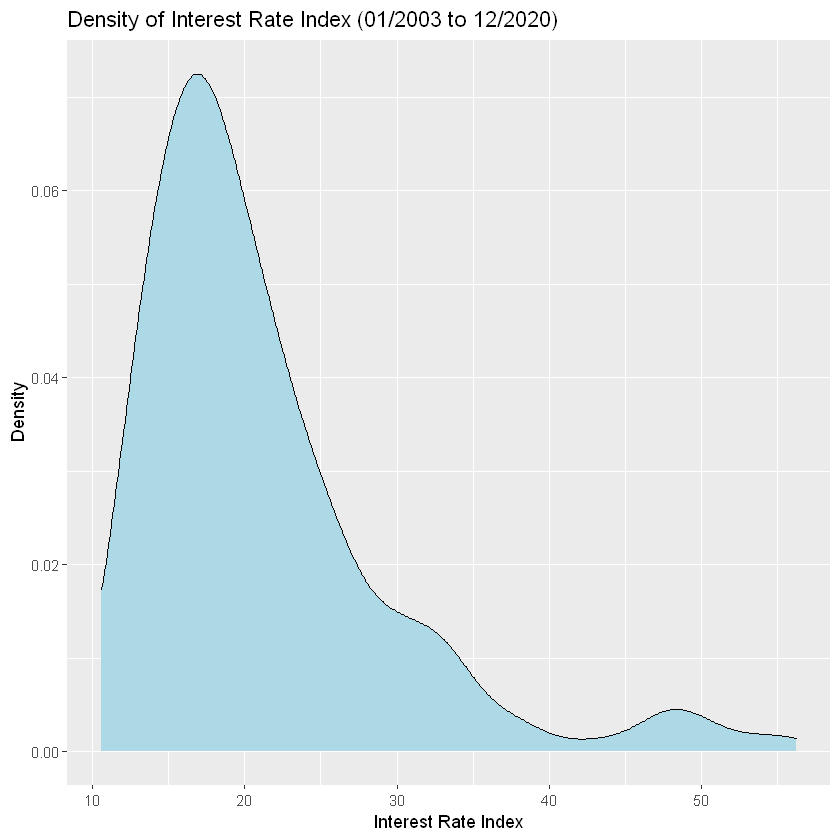

In [17]:
ggplot(df_ts, aes(interest_rate))+ggtitle("Density of Interest Rate Index (01/2003 to 12/2020)")+
  ylab("Density")+xlab("Interest Rate Index")+geom_density(fill="lightblue")

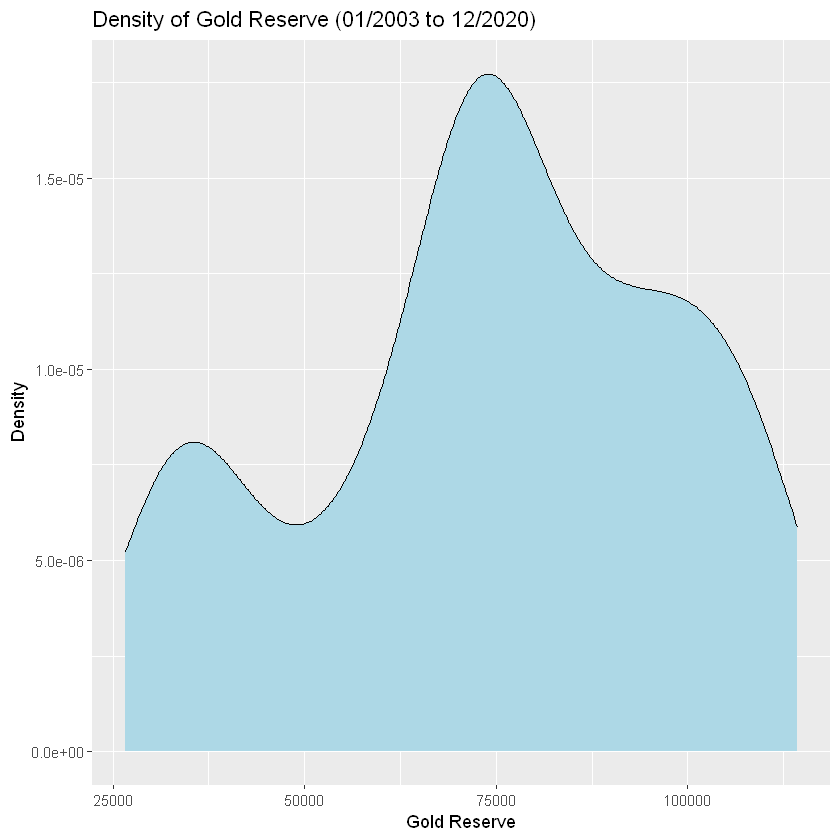

In [18]:
ggplot(df_ts, aes(gold_reserve))+ggtitle("Density of Gold Reserve (01/2003 to 12/2020)")+
  ylab("Density")+xlab("Gold Reserve")+geom_density(fill="lightblue")

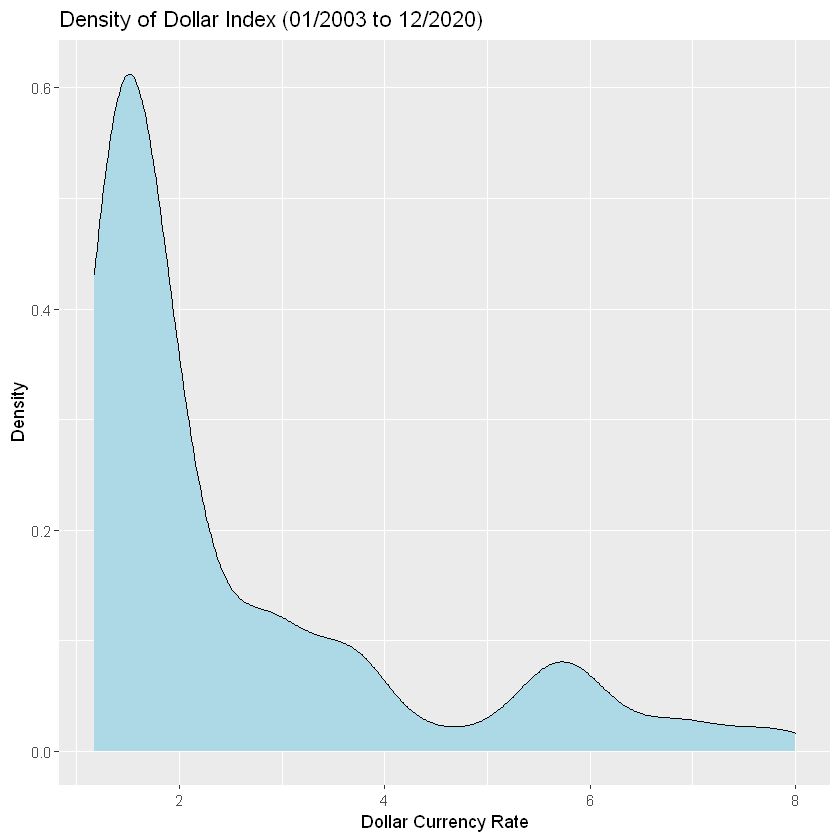

In [19]:
ggplot(df_ts, aes(dollar_rate))+ggtitle("Density of Dollar Index (01/2003 to 12/2020)")+
  ylab("Density")+xlab("Dollar Currency Rate")+geom_density(fill="lightblue")

One of the other possible visualization techniques for analyzing data is the density plot. However, the density plot cannot be enough indicator for concluding any decision. There is a similarity between Dollar Currency Rate and Price Index in terms of shape of density plot. In addition, density values for each datasets are varied because of diffence in the range of datasets. 

## e. Density Comparison for Normalized values of Indexes

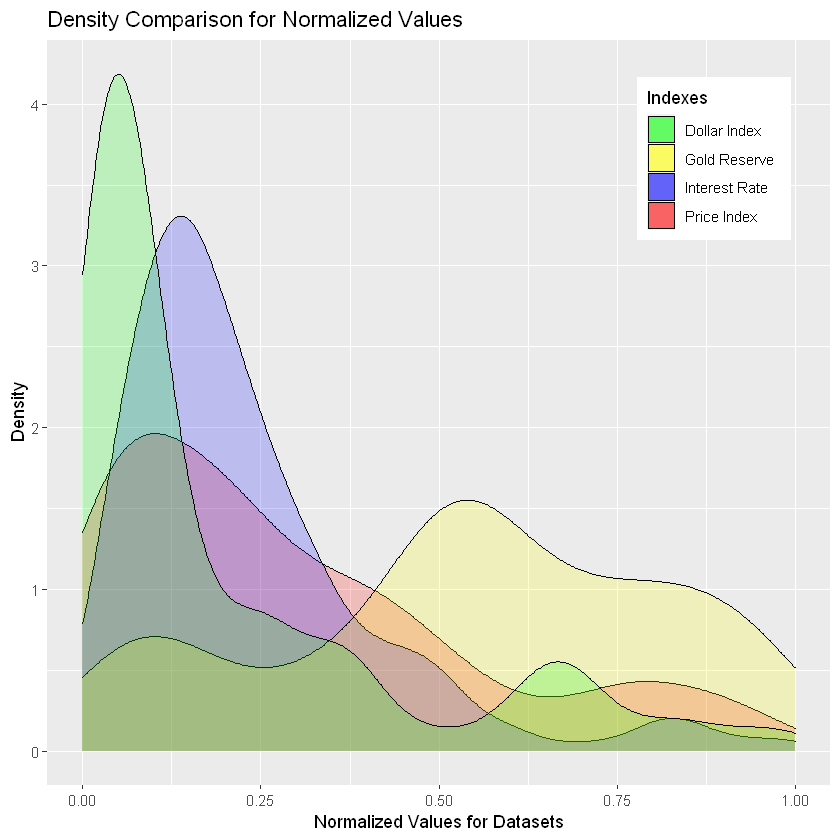

In [20]:
ggplot() +
  geom_density(aes(price_index_normalized , fill = "Price Index"), alpha = .2, data = df_ts) +
  geom_density(aes(interest_rate_normalized  , fill = "Interest Rate"), , alpha = .2, data = df_ts) +
  geom_density(aes(gold_reserve_normalized  , fill = "Gold Reserve"), , alpha = .2, data = df_ts) +  
  geom_density(aes(dollar_rate_normalized  , fill = "Dollar Index"), , alpha = .2, data = df_ts) + 
  scale_fill_manual(name = "Indexes", values = c("Price Index" = "red", "Interest Rate"="blue","Gold Reserve" = "yellow", "Dollar Index" = "green" ))+
  labs(title = "Density Comparison for Normalized Values", x="Normalized Values for Datasets", y="Density")+ 
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
    )

In order to solve the difference in values of density for each dataset, normalized values can be used. By doing that, all the density plots can be drawn at the same plot and this plot enables us to observe the shape of density plots more detailly. Again, the similarity between Dollar Currency Rate and Price Index in terms of shape of density plot is achieved in this plot. 

# 5. Correlation between the Indexes

Correlation analysis is a good analysis for understanding relationships between the datasets. There are a lot of different correlation analysis types, but all of them have similar results in terms of demonstrating the relations. Correlation analysis is made by using corrplot library. First of all, the correlation between the datasets is observed visually.

In [21]:
df_ts<-df_ts[,0:4]

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


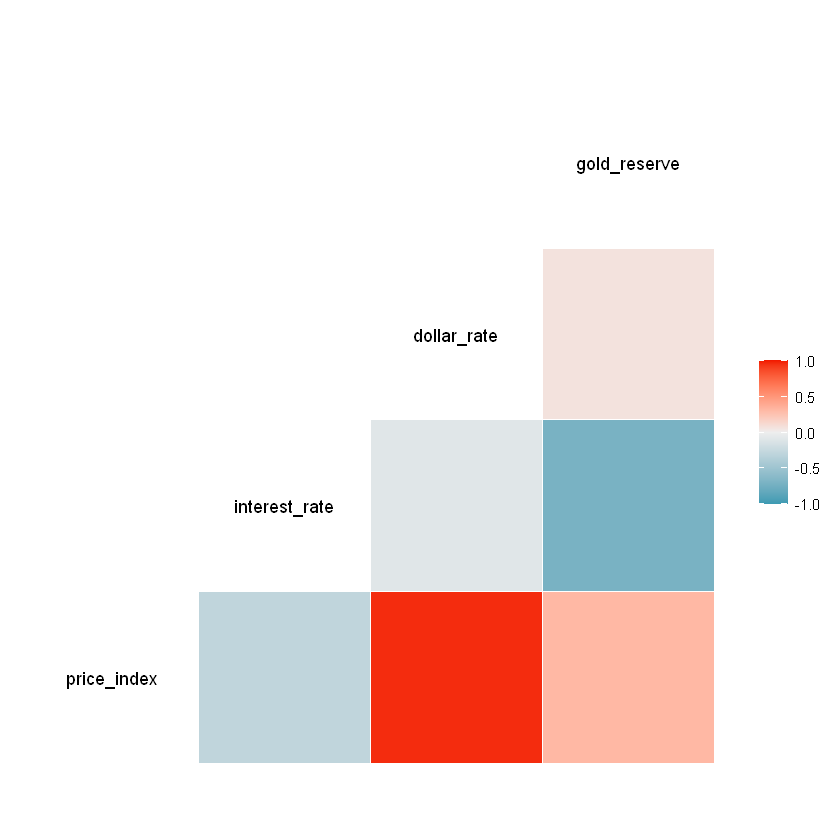

In [22]:
library(corrplot)
ggcorr(data.frame(df_ts), method = c("everything", "pearson")) 

Much as it can be said that there is a high correlation between the some determined values, it is hard to find exact correlation values by just looking at the color scale. 

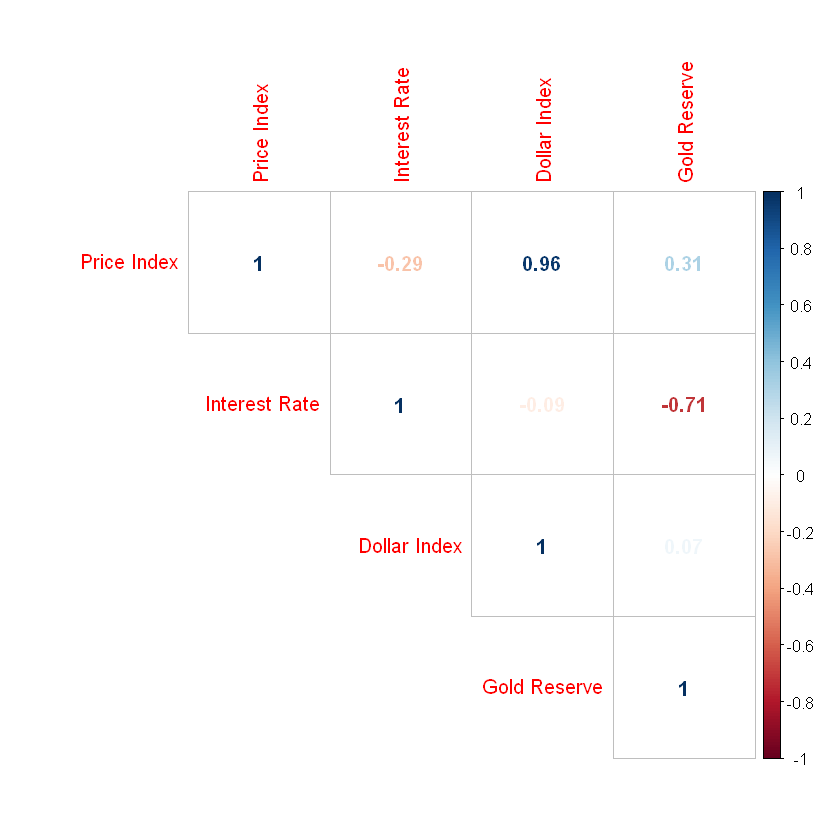

In [23]:
M<-cor(data.frame(df_ts))
colnames(M)<- c("Price Index", "Interest Rate", "Dollar Index", "Gold Reserve" )
rownames(M)<- c("Price Index", "Interest Rate", "Dollar Index", "Gold Reserve" )
corrplot(M,
  method = "number",
  type = "upper" ,# show only upper side
)

Exact correlation values are achieved in this analysis, and 0.96 can be counted as a high correlation in "pearson" correlation analysis. So, Price Index and Dollar Rate have high correlation by knowing that 1 represents the highest correlation. As mentioned before, Interest Rate and Golde Reserve don't have a high correlation because of there is absolute trend in these datasets. However, 0.3 is a good value to understand fluctuation in the target value, which will be evaluated in the phase of creating the model. 

In [38]:
cor(data.frame(df_ts), method = "pearson")

,price_index,interest_rate,dollar_rate,gold_reserve
price_index,1.0000000,-0.2888913,0.96287306,0.31140703
interest_rate,-0.2888913,1.0000000,-0.09047050,-0.71027592
dollar_rate,0.9628731,-0.0904705,1.00000000,0.06983446
gold_reserve,0.3114070,-0.7102759,0.06983446,1.00000000


A table result for correlation is also added to observe more precises (with decimal) correlation values for determined indexes. 

# 6. General Summary

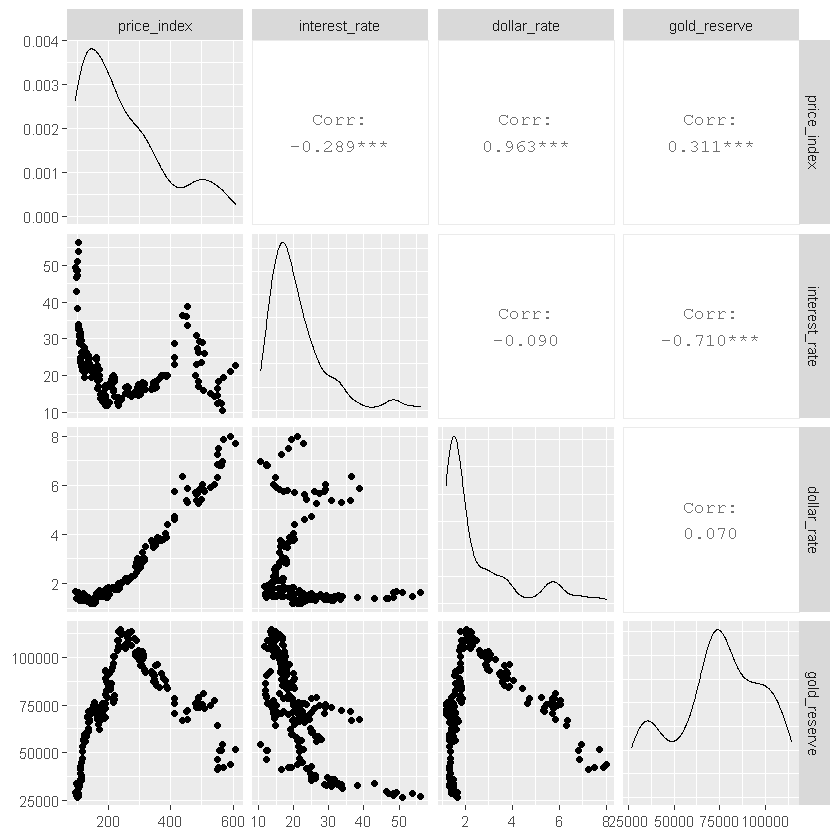

In [39]:
ggpairs(data.frame(df_ts))

ggpairs is one of the good options for overview and summarization of what obtained until now. Correlation, scatter plots, and density plots exist in the ggpairs. Again, the similarity between the datasets can be observed by looking at the shape of density plots and correlation values between the datasets. Namely, all determined values are relevant to the price index by looking at the given stars.

# Model



In [26]:
dt=as.data.table(df_ts)

Because of limited dataset, model can have overfitting in the determined values. In order to overcome this issue(at least check the over-fitting), dataset can be divided 2 different datasets. One of them will be train dataset which can be used for creating the model. After that, model can predict the target values in the test dataset. This predictions will be evaluated by different perspective to obtain accuracy of model. Indeed, subsetting can be made in different ways, but our aim is to predict price index in recent time period. So, train set includes data before 2018 and the test data includes the rest. Main applied rule for size of datasets is that 80% of the data allocated for training datasets. And the rest assigned as test dataset.

In [42]:
train=subset(dt,index<"2018-01-01")
test=subset(dt,index>="2018-01-01")

## First Model (with determined independent variables)

In [44]:
fit<- lm(price_index~dollar_rate+interest_rate+gold_reserve,train)
summary(fit)


Call:
lm(formula = price_index ~ dollar_rate + interest_rate + gold_reserve, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.524  -6.782   0.646   6.385  28.048 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.355e+00  6.956e+00  -0.770    0.442    
dollar_rate    7.453e+01  1.447e+00  51.497  < 2e-16 ***
interest_rate -9.484e-01  1.621e-01  -5.852 2.32e-08 ***
gold_reserve   1.085e-03  6.303e-05  17.215  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.59 on 176 degrees of freedom
Multiple R-squared:  0.9813,	Adjusted R-squared:  0.9809 
F-statistic:  3072 on 3 and 176 DF,  p-value: < 2.2e-16


In general, model has a good R-squared value and all the determined indipendent variables are significant(except Intercept that is not a determined variable). Much as model's R-squared value is a good indicator for model, target price has a trend so good R-squared value cannot be enough parameter for evaluating the model. So, Residual standard error shows some defects of the model. In order to obtain more information related to residuals of the model, checkresiduals can be used.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 137.87, df = 10, p-value < 2.2e-16


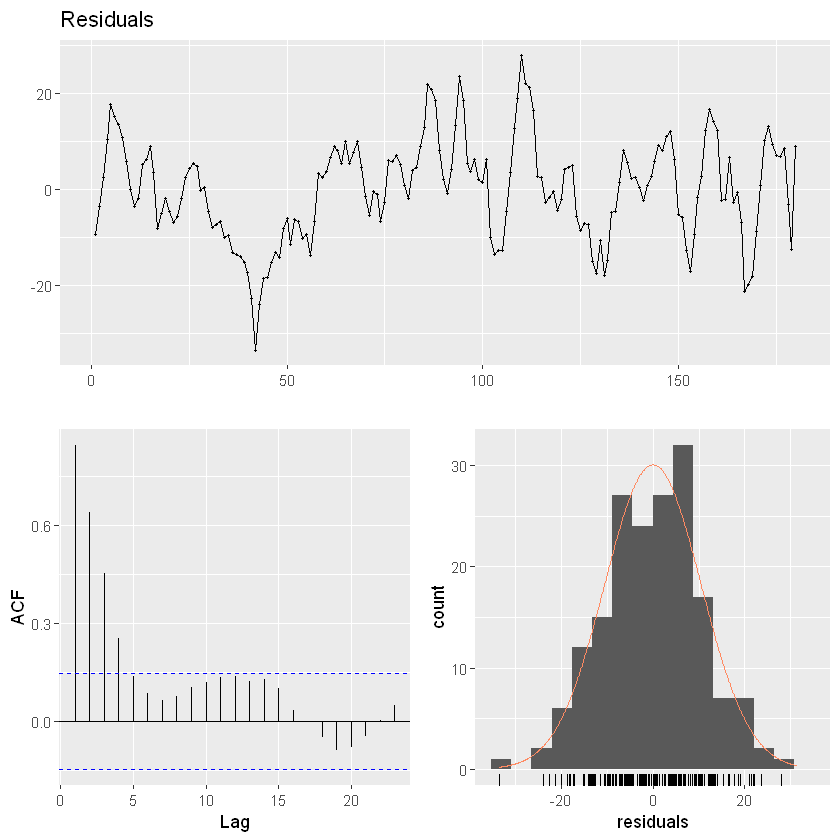

In [45]:
checkresiduals(fit)

It can be said that, resiuals distribution resembles to normal by looking the count plot. In addition mean of residuals is close to zero, which is also a desired feature for model's residuals. There is a 2 problem, one of them is that there is autocorrelation between the residuals(LM test = 137.87, df = 10, p-value < 2.2e-16), especially for lag 1 and lag 12(compared to sequential lags). So, Lag 1 and Lag 12 can be good indipendent variable for predicting the price index(target value). The other problem is non-stationary variance in the residuals. But this problem must be checked again in new model after added determined new indipendent features. 

## Second Model (with the same parameters and lag 2 and lag 12 of price index)

### Feature Adding

In [47]:
dt[,lag1:=shift(price_index,type="lag",n=1)]
dt[,lag12:=shift(price_index,type="lag",n=12)]

### Subsetting with new featues

In [48]:
train=subset(dt,index<"2018-01-01")
test=subset(dt,index>="2018-01-01")

### New Model

In [116]:
fit1<- lm(price_index~dollar_rate+interest_rate+lag1+lag12+gold_reserve,train)
summary(fit1)


Call:
lm(formula = price_index ~ dollar_rate + interest_rate + lag1 + 
    lag12 + gold_reserve, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5599  -2.0426   0.1105   2.1043   9.7244 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.570e-01  3.772e+00   0.148 0.882805    
dollar_rate    8.830e+00  2.282e+00   3.870 0.000158 ***
interest_rate -1.816e-01  1.204e-01  -1.508 0.133565    
lag1           7.486e-01  4.201e-02  17.818  < 2e-16 ***
lag12          1.581e-01  4.746e-02   3.330 0.001075 ** 
gold_reserve   1.151e-04  3.767e-05   3.056 0.002621 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.888 on 162 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9973 
F-statistic: 1.232e+04 on 5 and 162 DF,  p-value: < 2.2e-16


In new model, adjusted R-squared value is improved. However, 0.9973 can be a indicator for a over-fitting in the training dataset, but model will also be evaluated in test dataset. So, over-fitting situation will be considered in the nex section of the Homework. In addition, the biggest improve is achieved in the Residual standard value's of the model. Namely, Residual standard error decreased from 10.59 to 3.888. In addition, Min and Max value in the model for residuals are also decreased nearly to 30% of the previous model. In general, there is an improvement in the model for prediction at least for training dataset. Also, interest rate became insignificant for new model, but a different model trained without interest rate and checked in different perspectives. At the end, interest rate is a important role especially for huge differences in the future time period, which can be approved by looking the p value of the parameter. P value is too close to 0.1 and this situation enable us to keep this parameter in the model. Again, residual must be evaluated by using checkresidual function.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 35.187, df = 10, p-value = 0.000116


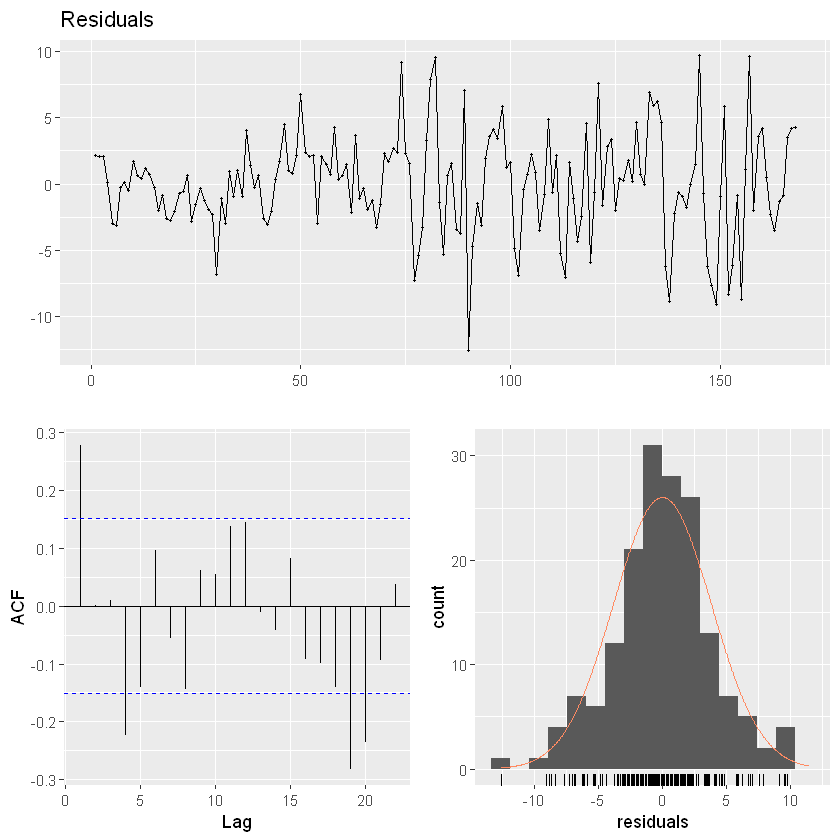

In [117]:
checkresiduals(fit1)

Again, distribution of residual resembles to normal distribution, which is a good indicator for the new model. In addition, Autocorrelation decreased a lot after adding the lagged values. Still there is autocorrelation between the residuals but it is much less than previous model's residuals. This fact can be obtained by looking Breusch-Godfrey test of these 2 model. There is a huge improvement in terms of autocorrelation. Lastly, residuals plot has 2 important information. The first one is that mean of the residuals is close to zero, which is desired feature for model. The second one is constant variance in the residuals. In this perspective, it is hard to say that there is a stationarity in the variance of residuals. Nevertheless, the variance didn't differentiate too much. So, model can be assumed as acceptable for future predictions. 

Lastly, month information doesn't seem reqired for the model. Nevertheless, month information is added a different model as factor information. All the check processes applied to this new model. However, there is no improvement in the model what achieved. But also, this new independent variables can cause an over-fitting by considering the input size of the model. Namely, 11 new features aren't reasonable to add to model, and all the execuations are removed to homework to make it more clear and understandable.

## Residual Analysis with Independent Variable

Alternative way to checkresiduals() is to plot residuals with independent variables, which enable us to get insight information related to relation in between the indipendent variables and errors in the predictions. By looking the plots, some improvements can be added to model or indipendent variables can be modified to make it proper for new model.

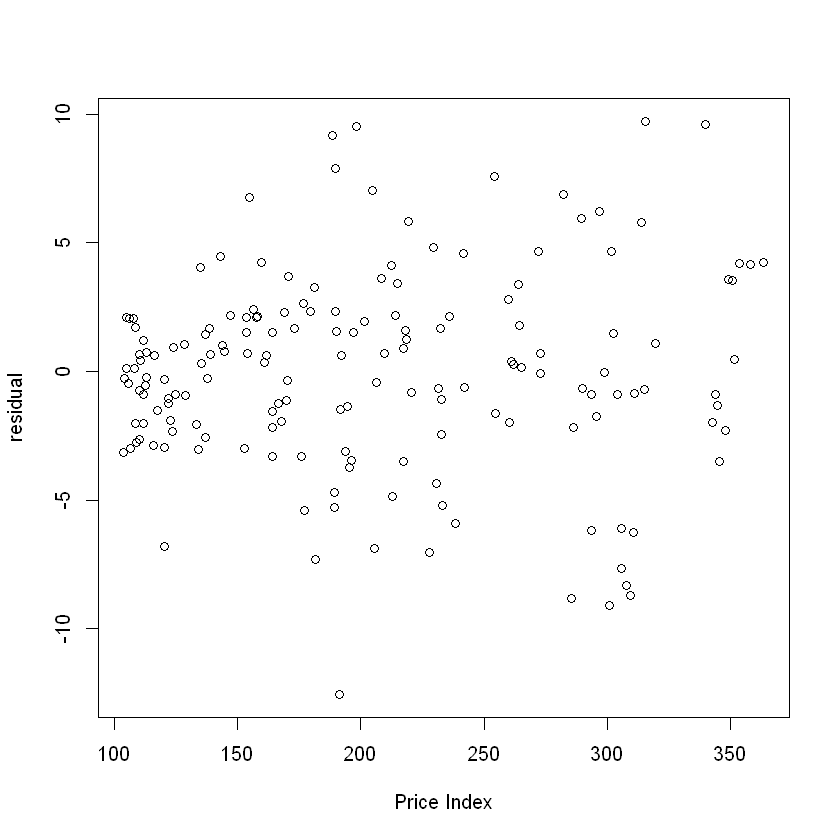

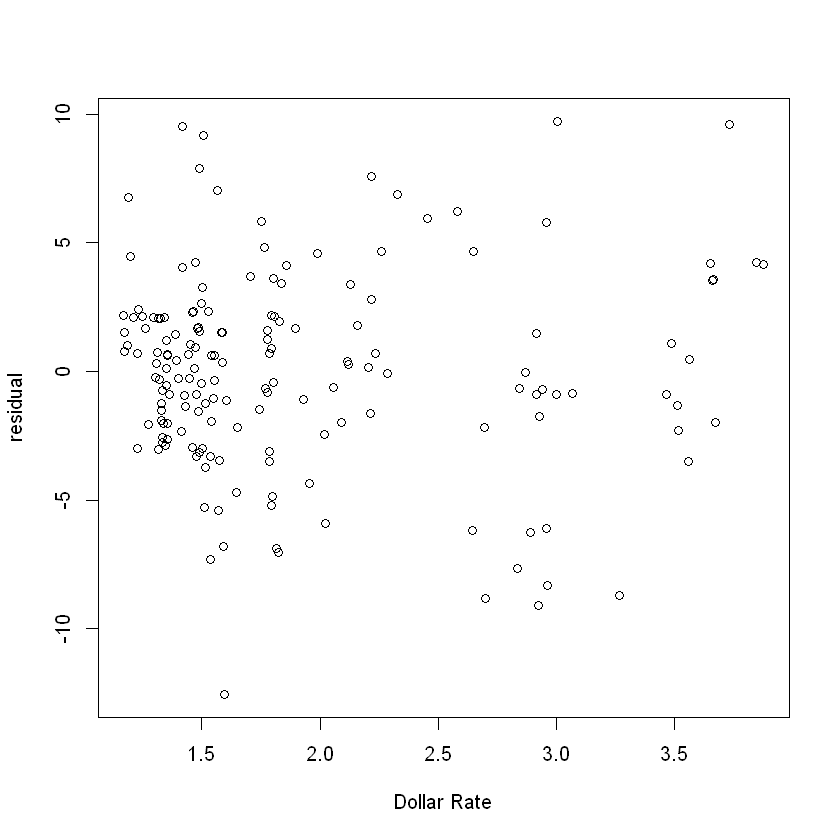

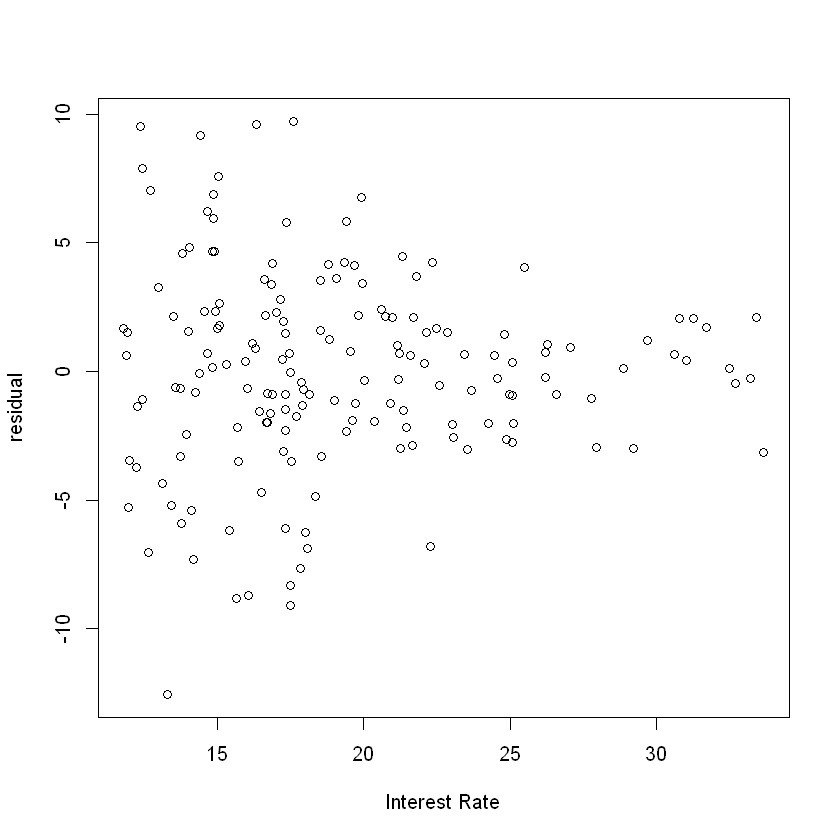

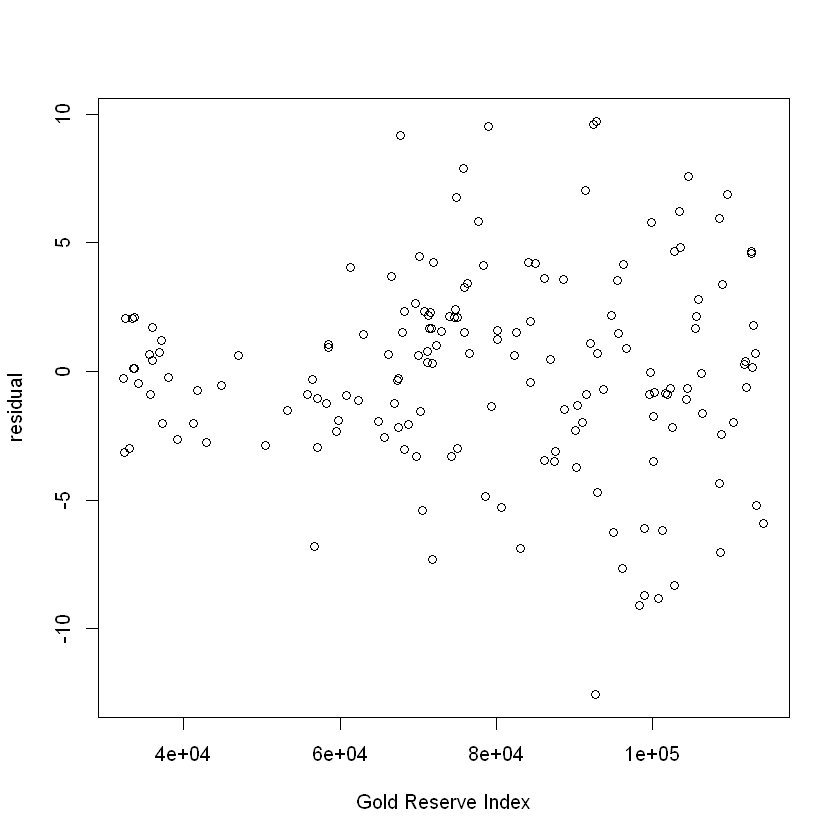

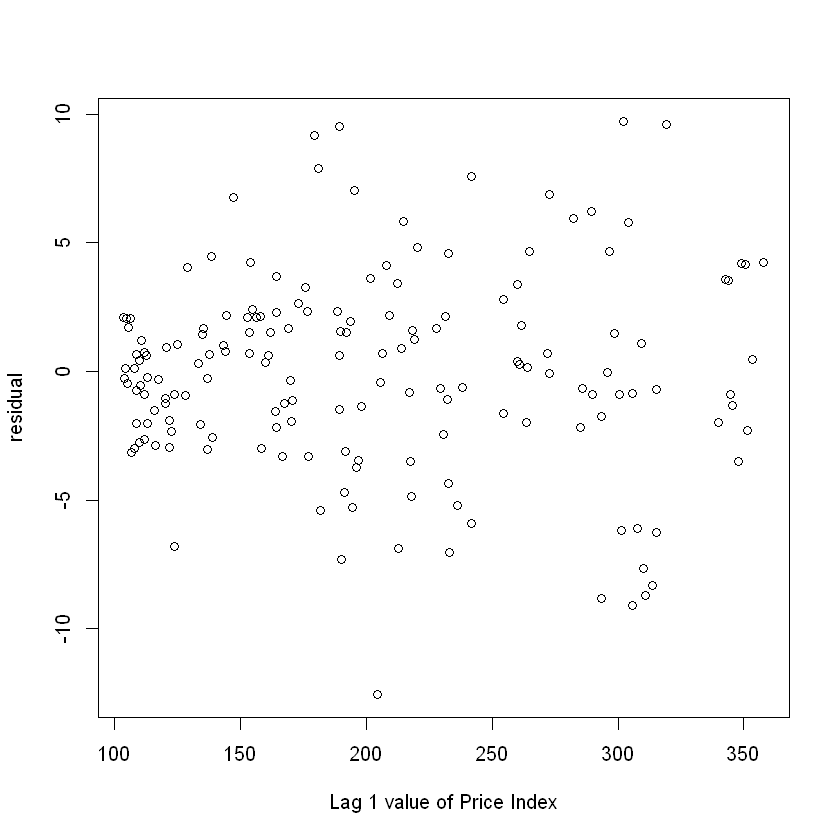

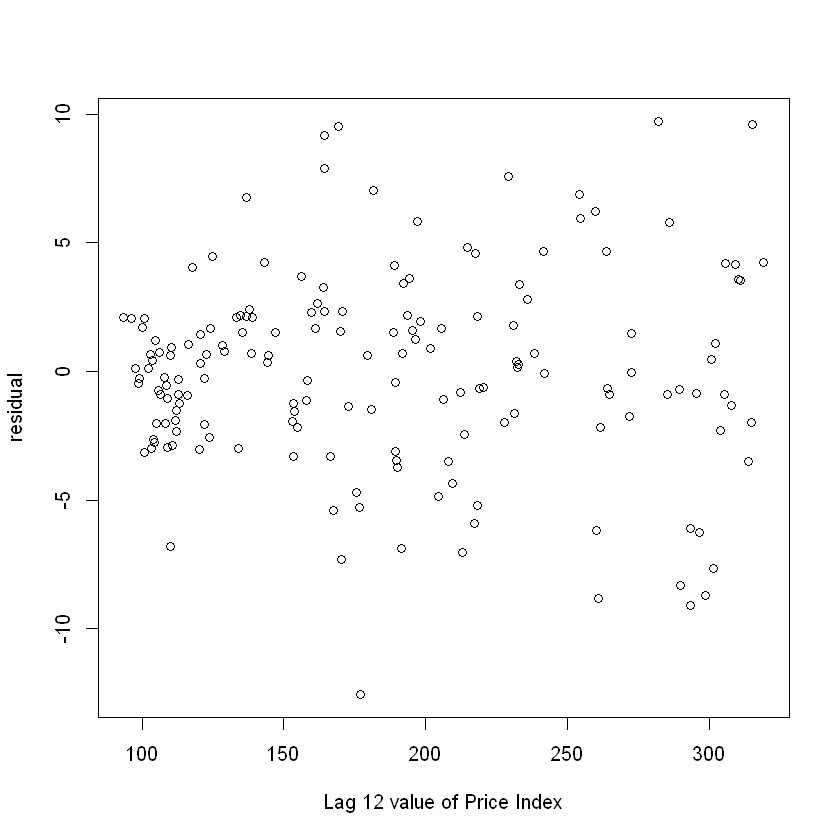

In [118]:
plot(train[c(13:.N)][,list("Price Index"=price_index,residual=fit1$residual)])
plot(train[c(13:.N)][,list("Dollar Rate"=dollar_rate ,residual=fit1$residual)])
plot(train[c(13:.N)][,list("Interest Rate"=interest_rate ,residual=fit1$residual)])
plot(train[c(13:.N)][,list("Gold Reserve Index"=gold_reserve,residual=fit1$residual)])
plot(train[c(13:.N)][,list("Lag 1 value of Price Index"=lag1 ,residual=fit1$residual)])
plot(train[c(13:.N)][,list("Lag 12 value of Price Index"=lag12,residual=fit1$residual)])

By looking at the plots, it is hard to find a problem related to the independent variables feature. So, modification in the model isn't required.

# Prediction with Determined Model

In [119]:
pred=predict(fit1, newdata=test)

### Comparison of actual and predicted values (Visually)

In [127]:
results_dt=data.table(Date=test$index,
                  act_price_index=test$price_index,
                  pred_price_index=pred)

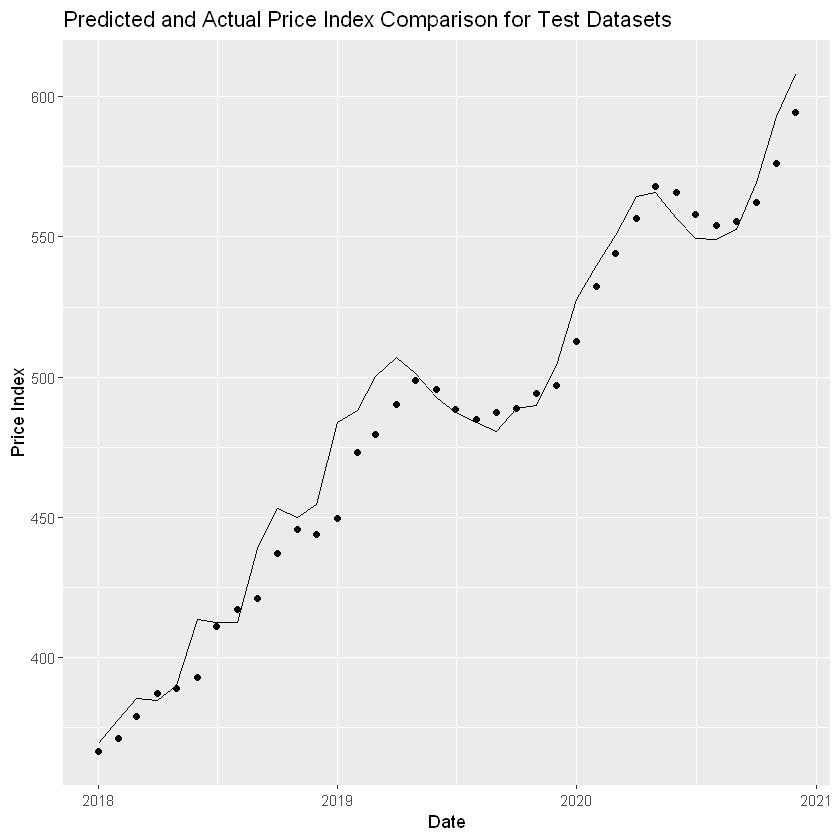

In [128]:
ggplot(results_dt,aes(x=Date,y=act_price_index))+geom_line()+
    geom_point(aes(y=pred_price_index))+ggtitle("Predicted and Actual Price Index Comparison for Test Datasets")+ylab("Price Index")

Line represents the actual value, and points are the predicted values for the Price Index. It can be said that model doesn't react immediately to the flactuations in the price index. But, this also a good feature for being smooth estimator. If size of training dataset was bigger than what have been trained, smoothness can be considered as a defect. However, smoothness can have possitive effect in terms of generalization error. 

### Statistical Information of Prediction

In [129]:
SSE=sum((pred-test$price_index)^2)
SST=sum((test$price_index-mean(test$price_index))^2)
R=1-(SSE/SST)
RSME=sqrt(SSE/nrow(test))
print(paste("R value is:", R))
print(paste("RMSE value is:", RSME))

[1] "R value is: 0.969235617164473"
[1] "RMSE value is: 11.3100321441525"


Statistical results also support the goodness of the model. In general, model can be used for predicting the future value of the Price Index.

# Prediction of 2020-12

In [130]:
results_dt[.N]

Date,act_price_index,pred_price_index
2020-12-01,608.06,594.2093


The last row of the result_dt show model's prediction and actual value for Price Index at 2020-12. The difference between the actual and predicted equals to 13.8507. Indeed, this value is a big value for difference but still it is a good prediction in case of an increase trend in the price index.

# 7. Conclusion 

Much as there are some researches related to determined questions none of them executed their analysis in Turkey. Namely, obtained conclusions may not be valid in different regions. In addition, all the researches made separately for determined datasets. In this analysis, all the determined analyzed simultaneously with datasets in Turkey. After all, determined questions are answered. What obtained and answered can be listed as follows:

* Resources mentioned in the intrıduction part is also valid for Turkey.
* There are relevancy between the researched parameters.
* Relevancy betweem the parameters are not only existing for increase trend but also for flactuations in values of indexes. 
* There are some similarities in the density plots of indexes. All the datasets have 2 different peaks in the value ranges.
* All the datasets highly correlated.

After approved the relevancy of the datasets in somehow, a model created by just adding the independent variable what determined. In this model, there was a relevancy between the residuals. This information obtained in 2 different tool, acf and Breusch-Godfrey are the these 2 tools. In order to decrease these autocorrelation in the residuals, lag 1 and lag 12 value of price index added to model. Why month information didn't be added to model avoid to over-fitting situation occuring the limited size of training datasets. After added these 2 features, R-squared value became higher and residual error decreased. But also, autocorrelation in the residuals are decreased and other fundamental requirements for linear regression is satisfied. 

Lastly, created model's performens checked with test dataset. All the possible check tools gave good results related to model. 2020-12 was predicted by determined model and compared to actual price index. There is 13.8507 difference in the actual and predicted value. However, this situation is caused from the smoothness in the predictions of the model, which is desired feature in the limited size of training datasets, and price index must have been affected with corona virus situation. Values related to corona virus cannot be added to model because it emerged in the last year and doesn't improve model. 

## 8. References

 All datasets obtained at <a href="https://evds2.tcmb.gov.tr/"> EVDS </a>